### LIBRARIES

Import libraries

In [1]:
from main import ClusterHandler
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.ml.feature import PCA
from pyspark.ml.regression import LinearRegression

### DATASET

To avoid compatibility issues encountered with the SparkSession method read.csv, we load the dataset with Pandas first. The useless "material" column is dropped.

In [2]:
data = pd.read_csv("data/molec_structure.csv")
data = data.drop(columns=["material"])

### SPARK SESSION

Start the Spark session

In [ ]:
#handler = ClusterHandler() # To test the code, use this local session builder
handler = ClusterHandler(type='remote', ip='192.168.137.1', port='7077')

handler.context


Session 'Session' created on masternode spark://192.168.137.1:7077
Spark UI (jobs tab) is available at http://SERENITY.mshome.net:4040



<SparkContext master=spark://192.168.137.1:7077 appName=Session>

### REGRESSION

Load the dataframe on the session

In [4]:
handler.generate_dataframe(data=data)
handler.dataframe.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+-------------+
|  H| He| Li| Be|  B|  C|  N|  O|  F| Ne| Na| Mg| Al| Si|  P|  S| Cl| Ar|  K| Ca| Sc| Ti|  V| Cr| Mn| Fe| Co| Ni|  Cu| Zn| Ga| Ge| As| Se| Br| Kr| Rb|  Sr|  Y| Zr| Nb| Mo| Tc| Ru| Rh| Pd|  Ag| Cd| In| Sn| Sb| Te|  I| Xe| Cs|  Ba|  La| Ce| Pr| Nd| Pm| Sm| Eu| Gd| Tb| Dy| Ho| Er| Tm| Yb| Lu| Hf| Ta|  W| Re| Os| Ir| Pt| Au| Hg| Tl| Pb| Bi| Po| At| Rn|critical_temp|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+

Assembling and scaling of the variables, except for the y

In [5]:
input_columns = [feature for feature in data.columns if feature != "critical_temp"]
handler.assemble_features(input_columns=input_columns)
handler.scale_features()

Definition and fit of the Regression model (regularization parameter tuned with 5-fold cross validation)

In [6]:
ridge = LinearRegression(featuresCol="features", labelCol="critical_temp", elasticNetParam=0)

fit_results = handler.fit_lr(model=ridge, y_column="critical_temp", folds=5, reg_params=[0.001, 0.01, 0.1, 0.5, 1.0])
fit_results

{'Lambda: 0.001; Elasticnet param: 0.0': 0.5229112228766949,
 'Lambda: 0.001; Elasticnet param: 0.5': 0.5229795300316388,
 'Lambda: 0.001; Elasticnet param: 1.0': 0.523048544627379,
 'Lambda: 0.01; Elasticnet param: 0.0': 0.5228510558641496,
 'Lambda: 0.01; Elasticnet param: 0.5': 0.5235332148081125,
 'Lambda: 0.01; Elasticnet param: 1.0': 0.5241781006558603,
 'Lambda: 0.1; Elasticnet param: 0.0': 0.522251977980172,
 'Lambda: 0.1; Elasticnet param: 0.5': 0.5275342473913498,
 'Lambda: 0.1; Elasticnet param: 1.0': 0.5321443626039984,
 'Lambda: 0.5; Elasticnet param: 0.0': 0.5196703110793507,
 'Lambda: 0.5; Elasticnet param: 0.5': 0.5423005001615172,
 'Lambda: 0.5; Elasticnet param: 1.0': 0.5537050406986719,
 'Lambda: 1.0; Elasticnet param: 0.0': 0.5166977508383633,
 'Lambda: 1.0; Elasticnet param: 0.5': 0.5518309398946981,
 'Lambda: 1.0; Elasticnet param: 1.0': 0.5689418312952366}

Extraction of the coefficients, sorted by the absolute value, and pairing with the corresponding features

In [7]:
handler.extract_lr_coefficients()

{'Ba': 18.938274675247857,
 'Hg': 11.820612091712913,
 'Sr': 10.672146238481764,
 'Ca': 5.810806825186667,
 'Tl': 4.333701695076895,
 'Ce': -3.8502259043497857,
 'Si': -2.7068091324094246,
 'Bi': 2.0817836940353684,
 'As': -1.358363300060935,
 'Ge': -1.3458643147915044,
 'Pt': -1.3037352136826756,
 'Cu': 1.2651377031196456,
 'Y': 0.6908703066628634,
 'O': 0.6529483241993789,
 'S': -0.5069817053096285,
 'Sn': -0.10072500851602066,
 'Zr': -0.025830246985343197,
 'H': 0.0,
 'He': 0.0,
 'Li': 0.0,
 'Be': 0.0,
 'B': 0.0,
 'C': 0.0,
 'N': 0.0,
 'F': 0.0,
 'Ne': 0.0,
 'Na': 0.0,
 'Mg': 0.0,
 'Al': 0.0,
 'P': 0.0,
 'Cl': 0.0,
 'Ar': 0.0,
 'K': 0.0,
 'Sc': 0.0,
 'Ti': 0.0,
 'V': 0.0,
 'Cr': 0.0,
 'Mn': 0.0,
 'Fe': 0.0,
 'Co': 0.0,
 'Ni': 0.0,
 'Zn': 0.0,
 'Ga': 0.0,
 'Se': 0.0,
 'Br': 0.0,
 'Kr': 0.0,
 'Rb': 0.0,
 'Nb': 0.0,
 'Mo': 0.0,
 'Tc': 0.0,
 'Ru': 0.0,
 'Rh': 0.0,
 'Pd': 0.0,
 'Ag': 0.0,
 'Cd': 0.0,
 'In': 0.0,
 'Sb': 0.0,
 'Te': 0.0,
 'I': 0.0,
 'Xe': 0.0,
 'Cs': 0.0,
 'La': 0.0,
 'Pr'

In [13]:
handler.extract_lr_coefficients()

{'Ba': 20.599279739333866,
 'Hg': 14.163897321233028,
 'Sr': 11.762805128837302,
 'Ca': 8.344822020593652,
 'Ce': -7.091193748694841,
 'Tl': 6.926172666683172,
 'Dy': 6.767224750707801,
 'Tb': 5.696275015081364,
 'Rb': 5.689161862405324,
 'Yb': 5.656204683099382,
 'F': 5.3434120147183854,
 'Er': 5.339249629537532,
 'Ho': 5.310078660701085,
 'Cs': 5.198380887004294,
 'Mg': 5.018006689283056,
 'Lu': 4.921016215769519,
 'Y': 4.3767338149945845,
 'Sm': 4.279188482291626,
 'As': -3.693051429622919,
 'Si': -3.5591777260424586,
 'W': -3.3369879309362096,
 'Ag': -3.242082247047586,
 'Bi': 3.128034135504203,
 'Tc': -2.9964179806693827,
 'Sc': 2.931549113010107,
 'Gd': 2.9107207106624036,
 'Br': -2.7912998390377632,
 'I': -2.764001496738415,
 'Ge': -2.6396789547757855,
 'Tm': 2.6343818388647957,
 'Os': -2.527387737973989,
 'Na': 2.498824800929316,
 'Pt': -2.0093643296609986,
 'S': -1.8504156146748971,
 'Nd': 1.8055655842958735,
 'K': 1.6838235027205886,
 'Hf': -1.648226829398742,
 'Eu': -1.38977

### PCA - PRINCIPAL COMPONENT ANALYSIS

Load the dataset on the session, this time separating the y to capture the variability expressed by the X features only

In [6]:
handler.generate_dataframe(data=data, y="critical_temp")
handler.dataframe.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|  H| He| Li| Be|  B|  C|  N|  O|  F| Ne| Na| Mg| Al| Si|  P|  S| Cl| Ar|  K| Ca| Sc| Ti|  V| Cr| Mn| Fe| Co| Ni|  Cu| Zn| Ga| Ge| As| Se| Br| Kr| Rb|  Sr|  Y| Zr| Nb| Mo| Tc| Ru| Rh| Pd|  Ag| Cd| In| Sn| Sb| Te|  I| Xe| Cs|  Ba|  La| Ce| Pr| Nd| Pm| Sm| Eu| Gd| Tb| Dy| Ho| Er| Tm| Yb| Lu| Hf| Ta|  W| Re| Os| Ir| Pt| Au| Hg| Tl| Pb| Bi| Po| At| Rn|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+

Assembling and scaling the features

In [7]:
handler.assemble_features()
handler.scale_features()

Definition and fit of the PCA model, extracting the explained variance for every dimension with the dedicated method

In [8]:
dimensions = 5
model = PCA(k=dimensions, inputCol="scaledFeatures", outputCol="pcaFeatures")
handler.fit_pca(model)

explained_variance = handler.pca_model.explainedVariance
print("Explained variance:", explained_variance)
print("Total explained variance:", np.sum(explained_variance))

Explained variance: [0.03570070222475502,0.03309973323434141,0.026095760450684503,0.024815300653723567,0.02391666105531337]
Total explained variance: 0.14362815761881786


Extraction of the coefficients for every dimension and sorting by absolute value, paired with the corresponding features

In [17]:
for dim in range(0, dimensions): 
    print(f"Coefficients for dimension {dim}: {handler.extract_pca_coefficients(dimension=dim)}")

Coefficients for dimension 0: {'O': -0.48382218059493864, 'Cu': -0.44296753389015825, 'Ba': -0.33785001048763547, 'Sr': -0.2464591783540548, 'Y': -0.22197462127071796, 'Fe': 0.20759685781767942, 'As': 0.1848971543266269, 'Pt': 0.1508292670874975, 'Bi': -0.14900887760492734, 'C': 0.12450193361921218, 'Ca': -0.11816355116351374, 'B': 0.1002067275493857, 'Nb': 0.09788388638252181, 'K': 0.09546510142673627, 'Tl': -0.09252549987010564, 'Ir': 0.092453369389358, 'Na': 0.09175730598881689, 'Ga': 0.0859333555075695, 'Hg': -0.08336100694039952, 'Mg': 0.08301919700641144, 'Rb': 0.08219335595446418, 'Gd': -0.08028103936045497, 'Se': 0.07971105704152721, 'V': 0.07640161755215599, 'S': 0.06955143478441576, 'Mo': 0.06935922694391791, 'Sb': 0.06846957543333428, 'Zr': 0.06838480495416843, 'N': 0.06663191615144475, 'Ta': 0.06612922247092626, 'Ni': 0.06546635768799182, 'In': 0.06513876146900116, 'H': 0.06510528041305089, 'Pd': 0.06392044375483488, 'Rh': 0.06162053892471374, 'Li': 0.06113562325199695, 'Lu

Plots of the results (3D and 2D)

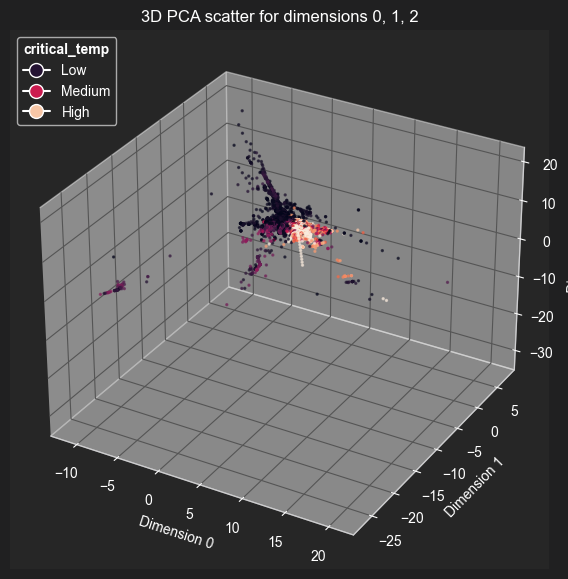

In [9]:
handler.plot_3d_pca(dimensions=[0,1,2], color_by="critical_temp")

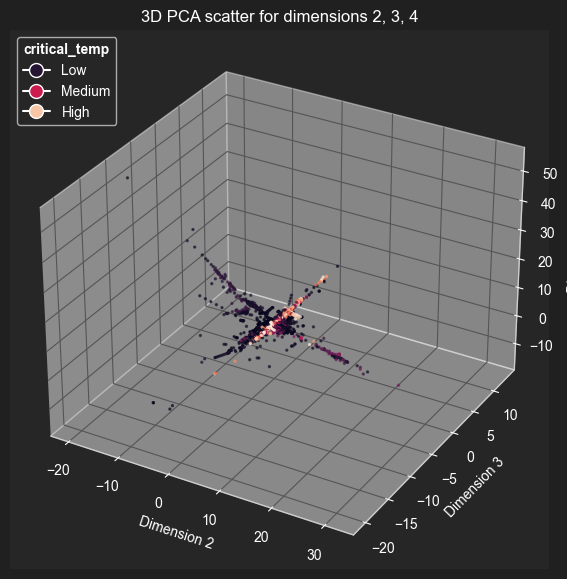

In [26]:
handler.plot_3d_pca(dimensions=[2,3,4], color_by="critical_temp")

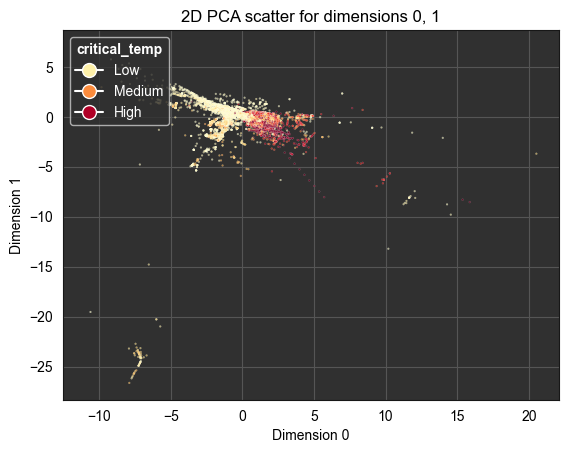

In [10]:
handler.plot_2d_pca(dimensions=[0,1], color_by="critical_temp", cmap="YlOrRd")

Text(0.5, 1.0, 'Critical temperature on first PCA dimension')

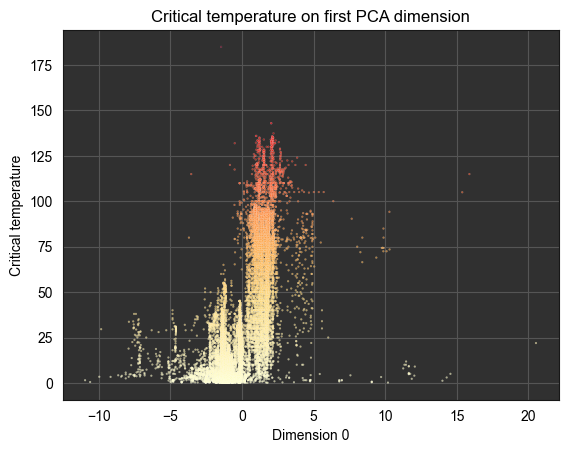

In [12]:
handler.load_theme("light")

sns.scatterplot(
    x=handler.pca_transposed[0], y=handler.y["critical_temp"], s=2, alpha=0.6,
    c=handler.y["critical_temp"], cmap="YlOrRd"
)
plt.xlabel(f'Dimension 0')
plt.ylabel(f'Critical temperature')
plt.title(f'Critical temperature on first PCA dimension', color="black")